In [1]:
import numpy as np
import scipy
from scipy import signal
import soundfile as sf
import struct
import matplotlib.pyplot as plt
import pandas as pd
#%matplotlib tk

Theoretical calculation of PDM built-in high pass filter

In [ ]:
HP_Gain = -11

filtNumer = np.array([1., -1.], dtype=float)

filtDenom = np.array([1, -(1-2**HP_Gain)], dtype=float)

print('numerator: {}; Denominator: {}. '.format(filtNumer, filtDenom))

w, h = signal.freqz(filtNumer, filtDenom, fs=16000)

fig, ax1 = plt.subplots()
ax1.set_title('linear phase filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()


Apollo application digital filter theoretical calculation

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


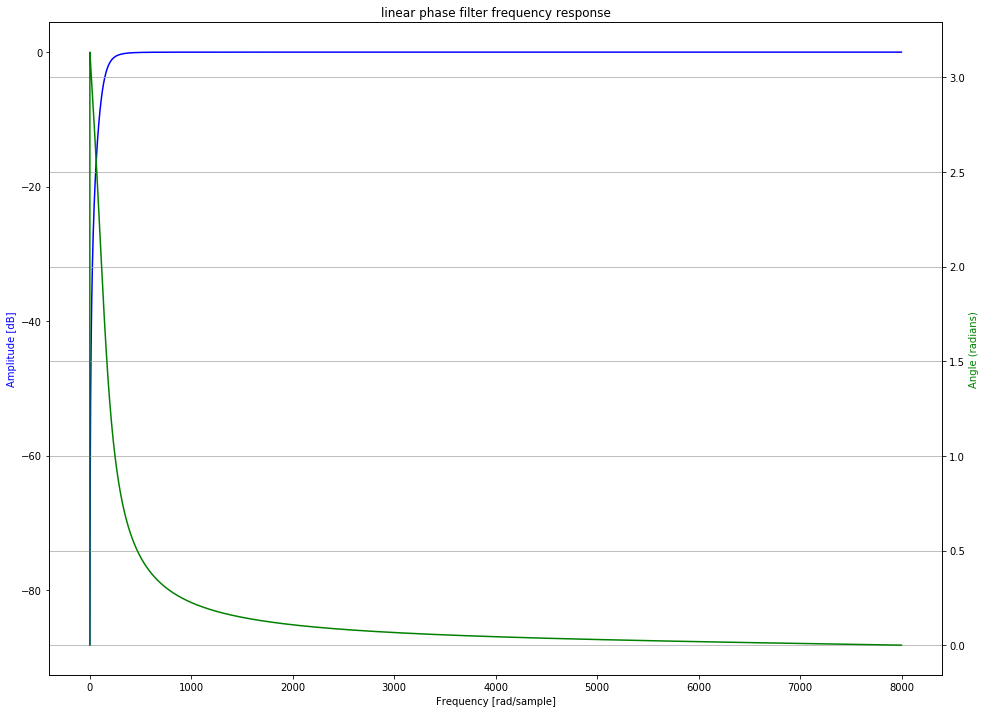

In [5]:
DF_numer = np.array([0.9565432255568771, -1.9130864511137542, 0.9565432255568771], dtype=float)
DF_denom = np.array([1, -1.9111970674260734, 0.9149758348014341], dtype=float)

w, h = signal.freqz(DF_numer, DF_denom, worN=8000, fs=16000)

fig, ax1 = plt.subplots(figsize=(16,12))
ax1.set_title('linear phase filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')
ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight')
plt.show()

Generate a sinusoidal signal for test

In [ ]:
f = 2000
amp = 24000
Fs = 16000
sig_length = 1024

local_test_sig = []
for i in range(sig_length):
    local_test_sig.append(amp * np.sin(2*np.pi*f*i/Fs))
local_test_sig = np.array(local_test_sig)

fig = plt.figure(figsize=(12,10))
plt.title("original input signal")
plt.plot(local_test_sig, 'b')
plt.grid(True)
plt.show()

In [ ]:
apollo_digital_filter_output = signal.lfilter(DF_numer, DF_denom, local_test_sig)

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.title("original and filtered audio signal")
plt.plot(local_test_sig, 'b')
plt.plot(apollo_digital_filter_output, 'r')
plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()

In [ ]:
apollo_DF_output = [0.0, 22162.150391, 29374.988281, 17501.757813, -6409.347656, -28263.210938, -35170.917969, -22996.597656,
1210.757813, 23355.326172, 30547.568359, 18651.062500, -5285.683594, -27167.253906, -34104.453125, -21961.148438,
2213.917969, 24325.152344, 31483.228516, 19551.925781, -4420.058594, -26337.140625, -33309.968750, -21202.265625,
2937.359375, 25013.433594, 32136.738281, 20171.148438, -3834.546875, -25784.687500, -32789.851563, -20713.699219,
3395.210938, 25441.449219, 32535.839844, 20542.289063, -3490.394531, -25466.529297, -32496.677734, -20444.492188,
3641.468750, 25665.781250, 32739.261719, 20725.808594, -3325.777344, -25319.828125, -32366.923828, -20330.734375,
3740.164063, 25750.320313, 32810.527344, 20784.660156, -3278.507813, -25283.335938, -32340.431641, -20313.492188,
3748.875000, 25751.191406, 32804.222656, 20771.816406, -3297.285156, -25307.470703, -32369.375000, -20346.726563,
3711.839844, 25710.820313, 32760.951172, 20726.050781, -3345.160156, -25357.095703, -32420.416016, -20398.875000,
3658.878906, 25657.316406, 32707.152344, 20672.187500, -3398.878906, -25410.478516, -32473.291016, -20451.085938,
3607.468750, 25606.833984, 32657.710938, 20623.882813, -3445.960938, -25456.263672, -32517.716797, -20494.097656,
3565.914063, 25566.767578, 32619.158203, 20586.863281, -3481.441406, -25490.203125, -32550.117188, -20524.964844,
3536.566406, 25538.921875, 32592.791016, 20561.949219, -3504.929688, -25512.296875, -32570.851563, -20544.378906,
3518.433594, 25522.029297, 32577.097656, 20547.410156, -3518.359375, -25524.660156, -32582.191406, -20554.738281,
3509.011719, 25513.500000, 32569.417969, 20540.535156, -3524.468750, -25530.046875, -32586.894531, -20558.796875,
3505.554688, 25510.609375, 32567.052734, 20538.664063, -3525.882813, -25531.037109, -32587.496094, -20559.039063,
3505.648438, 25511.007813, 32567.728516, 20539.589844, -3524.730469, -25529.683594, -32585.964844, -20557.355469,
3507.460938, 25512.931641, 32569.746094, 20541.687500, -3522.570313, -25527.472656, -32583.714844, -20555.078125,
3509.757813, 25515.238281, 32572.054688, 20543.988281, -3520.281250, -25525.203125, -32581.468750, -20552.863281,
3511.937500, 25517.378906, 32574.150391, 20546.035156, -3518.289063, -25523.269531, -32579.597656, -20551.054688,
3513.679688, 25519.052734, 32575.755859, 20547.570313, -3516.824219, -25521.873047, -32578.269531, -20549.792969,
3514.875000, 25520.183594, 32576.826172, 20548.578125, -3515.875000, -25520.982422, -32577.433594, -20549.011719,
3515.601563, 25520.857422, 32577.445313, 20549.148438, -3515.351563, -25520.503906, -32577.0, -20548.621094,
3515.953125, 25521.171875, 32577.726563, 20549.398438, -3515.132813, -25520.314453, -32576.839844, -20548.488281,
3516.062500, 25521.257813, 32577.789063, 20549.437500, -3515.117188, -25520.320313, -32576.863281, -20548.523438,
3516.015625, 25521.201172, 32577.722656, 20549.363281, -3515.195313, -25520.400391, -32576.947266, -20548.613281,
3515.917969, 25521.097656, 32577.617188, 20549.253906, -3515.312500, -25520.525391, -32577.078125, -20548.746094,
3515.785156, 25520.964844, 32577.484375, 20549.125000, -3515.433594, -25520.640625, -32577.185547, -20548.851563,
3515.679688, 25520.859375, 32577.378906, 20549.015625, -3515.546875, -25520.753906, -32577.300781, -20548.964844,
3515.574219, 25520.761719, 32577.287109, 20548.933594, -3515.617188, -25520.814453, -32577.349609, -20549.003906,
3515.539063, 25520.730469, 32577.261719, 20548.910156, -3515.640625, -25520.837891, -32577.375000, -20549.035156,
3515.503906, 25520.691406, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125,
3515.460938, 25520.648438, 32577.175781, 20548.824219, -3515.726563, -25520.923828, -32577.460938, -20549.121094,
3515.417969, 25520.605469, 32577.132813, 20548.781250, -3515.769531, -25520.966797, -32577.503906, -20549.160156,
3515.382813, 25520.574219, 32577.107422, 20548.761719, -3515.781250, -25520.972656, -32577.503906, -20549.156250,
3515.390625, 25520.585938, 32577.121094, 20548.773438, -3515.773438, -25520.966797, -32577.500000, -20549.152344,
3515.394531, 25520.589844, 32577.125000, 20548.781250, -3515.761719, -25520.953125, -32577.484375, -20549.132813,
3515.417969, 25520.615234, 32577.152344, 20548.812500, -3515.722656, -25520.904297, -32577.425781, -20549.066406,
3515.488281, 25520.689453, 32577.230469, 20548.890625, -3515.648438, -25520.835938, -32577.363281, -20549.011719,
3515.539063, 25520.738281, 32577.277344, 20548.933594, -3515.609375, -25520.800781, -32577.333984, -20548.988281,
3515.554688, 25520.746094, 32577.277344, 20548.929688, -3515.617188, -25520.810547, -32577.341797, -20548.992188,
3515.558594, 25520.755859, 32577.292969, 20548.945313, -3515.601563, -25520.796875, -32577.332031, -20548.988281,
3515.550781, 25520.738281, 32577.265625, 20548.910156, -3515.644531, -25520.845703, -32577.386719, -20549.046875,
3515.496094, 25520.687500, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125,
3515.460938, 25520.648438, 32577.175781, 20548.824219, -3515.726563, -25520.923828, -32577.460938, -20549.121094,
3515.417969, 25520.605469, 32577.132813, 20548.781250, -3515.769531, -25520.966797, -32577.503906, -20549.160156,
3515.382813, 25520.574219, 32577.107422, 20548.761719, -3515.781250, -25520.972656, -32577.503906, -20549.156250,
3515.390625, 25520.585938, 32577.121094, 20548.773438, -3515.773438, -25520.966797, -32577.500000, -20549.152344,
3515.394531, 25520.589844, 32577.125000, 20548.781250, -3515.761719, -25520.953125, -32577.484375, -20549.132813,
3515.417969, 25520.615234, 32577.152344, 20548.812500, -3515.722656, -25520.904297, -32577.425781, -20549.066406,
3515.488281, 25520.689453, 32577.230469, 20548.890625, -3515.648438, -25520.835938, -32577.363281, -20549.011719,
3515.539063, 25520.738281, 32577.277344, 20548.933594, -3515.609375, -25520.800781, -32577.333984, -20548.988281,
3515.554688, 25520.746094, 32577.277344, 20548.929688, -3515.617188, -25520.810547, -32577.341797, -20548.992188,
3515.558594, 25520.755859, 32577.292969, 20548.945313, -3515.601563, -25520.796875, -32577.332031, -20548.988281,
3515.550781, 25520.738281, 32577.265625, 20548.910156, -3515.644531, -25520.845703, -32577.386719, -20549.046875,
3515.496094, 25520.687500, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125,
3515.460938, 25520.648438, 32577.175781, 20548.824219, -3515.726563, -25520.923828, -32577.460938, -20549.121094,
3515.417969, 25520.605469, 32577.132813, 20548.781250, -3515.769531, -25520.966797, -32577.503906, -20549.160156,
3515.382813, 25520.574219, 32577.107422, 20548.761719, -3515.781250, -25520.972656, -32577.503906, -20549.156250,
3515.390625, 25520.585938, 32577.121094, 20548.773438, -3515.773438, -25520.966797, -32577.500000, -20549.152344,
3515.394531, 25520.589844, 32577.125000, 20548.781250, -3515.761719, -25520.953125, -32577.484375, -20549.132813,
3515.417969, 25520.615234, 32577.152344, 20548.812500, -3515.722656, -25520.904297, -32577.425781, -20549.066406,
3515.488281, 25520.689453, 32577.230469, 20548.890625, -3515.648438, -25520.835938, -32577.363281, -20549.011719,
3515.539063, 25520.738281, 32577.277344, 20548.933594, -3515.609375, -25520.800781, -32577.333984, -20548.988281,
3515.554688, 25520.746094, 32577.277344, 20548.929688, -3515.617188, -25520.810547, -32577.341797, -20548.992188,
3515.558594, 25520.755859, 32577.292969, 20548.945313, -3515.601563, -25520.796875, -32577.332031, -20548.988281,
3515.550781, 25520.738281, 32577.265625, 20548.910156, -3515.644531, -25520.845703, -32577.386719, -20549.046875,
3515.496094, 25520.687500, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125,
3515.460938, 25520.648438, 32577.175781, 20548.824219, -3515.726563, -25520.923828, -32577.460938, -20549.121094,
3515.417969, 25520.605469, 32577.132813, 20548.781250, -3515.769531, -25520.966797, -32577.503906, -20549.160156,
3515.382813, 25520.574219, 32577.107422, 20548.761719, -3515.781250, -25520.972656, -32577.503906, -20549.156250,
3515.390625, 25520.585938, 32577.121094, 20548.773438, -3515.773438, -25520.966797, -32577.500000, -20549.152344,
3515.394531, 25520.589844, 32577.125000, 20548.781250, -3515.761719, -25520.953125, -32577.484375, -20549.132813,
3515.417969, 25520.615234, 32577.152344, 20548.812500, -3515.722656, -25520.904297, -32577.425781, -20549.066406,
3515.488281, 25520.689453, 32577.230469, 20548.890625, -3515.648438, -25520.835938, -32577.363281, -20549.011719,
3515.539063, 25520.738281, 32577.277344, 20548.933594, -3515.609375, -25520.800781, -32577.333984, -20548.988281,
3515.554688, 25520.746094, 32577.277344, 20548.929688, -3515.617188, -25520.810547, -32577.341797, -20548.992188,
3515.558594, 25520.755859, 32577.292969, 20548.945313, -3515.601563, -25520.796875, -32577.332031, -20548.988281,
3515.550781, 25520.738281, 32577.265625, 20548.910156, -3515.644531, -25520.845703, -32577.386719, -20549.046875,
3515.496094, 25520.687500, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125,
3515.460938, 25520.648438, 32577.175781, 20548.824219, -3515.726563, -25520.923828, -32577.460938, -20549.121094,
3515.417969, 25520.605469, 32577.132813, 20548.781250, -3515.769531, -25520.966797, -32577.503906, -20549.160156,
3515.382813, 25520.574219, 32577.107422, 20548.761719, -3515.781250, -25520.972656, -32577.503906, -20549.156250,
3515.390625, 25520.585938, 32577.121094, 20548.773438, -3515.773438, -25520.966797, -32577.500000, -20549.152344,
3515.394531, 25520.589844, 32577.125000, 20548.781250, -3515.761719, -25520.953125, -32577.484375, -20549.132813,
3515.417969, 25520.615234, 32577.152344, 20548.812500, -3515.722656, -25520.904297, -32577.425781, -20549.066406,
3515.488281, 25520.689453, 32577.230469, 20548.890625, -3515.648438, -25520.835938, -32577.363281, -20549.011719,
3515.539063, 25520.738281, 32577.277344, 20548.933594, -3515.609375, -25520.800781, -32577.333984, -20548.988281,
3515.554688, 25520.746094, 32577.277344, 20548.929688, -3515.617188, -25520.810547, -32577.341797, -20548.992188,
3515.558594, 25520.755859, 32577.292969, 20548.945313, -3515.601563, -25520.796875, -32577.332031, -20548.988281,
3515.550781, 25520.738281, 32577.265625, 20548.910156, -3515.644531, -25520.845703, -32577.386719, -20549.046875,
3515.496094, 25520.687500, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125,
3515.460938, 25520.648438, 32577.175781, 20548.824219, -3515.726563, -25520.923828, -32577.460938, -20549.121094,
3515.417969, 25520.605469, 32577.132813, 20548.781250, -3515.769531, -25520.966797, -32577.503906, -20549.160156,
3515.382813, 25520.574219, 32577.107422, 20548.761719, -3515.781250, -25520.972656, -32577.503906, -20549.156250,
3515.390625, 25520.585938, 32577.121094, 20548.773438, -3515.773438, -25520.966797, -32577.500000, -20549.152344,
3515.394531, 25520.589844, 32577.125000, 20548.781250, -3515.761719, -25520.953125, -32577.484375, -20549.132813,
3515.417969, 25520.615234, 32577.152344, 20548.812500, -3515.722656, -25520.904297, -32577.425781, -20549.066406,
3515.488281, 25520.689453, 32577.230469, 20548.890625, -3515.648438, -25520.835938, -32577.363281, -20549.011719,
3515.539063, 25520.738281, 32577.277344, 20548.933594, -3515.609375, -25520.800781, -32577.333984, -20548.988281,
3515.554688, 25520.746094, 32577.277344, 20548.929688, -3515.617188, -25520.810547, -32577.341797, -20548.992188,
3515.558594, 25520.755859, 32577.292969, 20548.945313, -3515.601563, -25520.796875, -32577.332031, -20548.988281,
3515.550781, 25520.738281, 32577.265625, 20548.910156, -3515.644531, -25520.845703, -32577.386719, -20549.046875,
3515.496094, 25520.687500, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125,
3515.460938, 25520.648438, 32577.175781, 20548.824219, -3515.726563, -25520.923828, -32577.460938, -20549.121094,
3515.417969, 25520.605469, 32577.132813, 20548.781250, -3515.769531, -25520.966797, -32577.503906, -20549.160156,
3515.382813, 25520.574219, 32577.107422, 20548.761719, -3515.781250, -25520.972656, -32577.503906, -20549.156250,
3515.390625, 25520.585938, 32577.121094, 20548.773438, -3515.773438, -25520.966797, -32577.500000, -20549.152344,
3515.394531, 25520.589844, 32577.125000, 20548.781250, -3515.761719, -25520.953125, -32577.484375, -20549.132813,
3515.417969, 25520.615234, 32577.152344, 20548.812500, -3515.722656, -25520.904297, -32577.425781, -20549.066406,
3515.488281, 25520.689453, 32577.230469, 20548.890625, -3515.648438, -25520.835938, -32577.363281, -20549.011719,
3515.539063, 25520.738281, 32577.277344, 20548.933594, -3515.609375, -25520.800781, -32577.333984, -20548.988281,
3515.554688, 25520.746094, 32577.277344, 20548.929688, -3515.617188, -25520.810547, -32577.341797, -20548.992188,
3515.558594, 25520.755859, 32577.292969, 20548.945313, -3515.601563, -25520.796875, -32577.332031, -20548.988281,
3515.550781, 25520.738281, 32577.265625, 20548.910156, -3515.644531, -25520.845703, -32577.386719, -20549.046875,
3515.496094, 25520.687500, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125,
3515.460938, 25520.648438, 32577.175781, 20548.824219, -3515.726563, -25520.923828, -32577.460938, -20549.121094,
3515.417969, 25520.605469, 32577.132813, 20548.781250, -3515.769531, -25520.966797, -32577.503906, -20549.160156,
3515.382813, 25520.574219, 32577.107422, 20548.761719, -3515.781250, -25520.972656, -32577.503906, -20549.156250,
3515.390625, 25520.585938, 32577.121094, 20548.773438, -3515.773438, -25520.966797, -32577.500000, -20549.152344,
3515.394531, 25520.589844, 32577.125000, 20548.781250, -3515.761719, -25520.953125, -32577.484375, -20549.132813,
3515.417969, 25520.615234, 32577.152344, 20548.812500, -3515.722656, -25520.904297, -32577.425781, -20549.066406,
3515.488281, 25520.689453, 32577.230469, 20548.890625, -3515.648438, -25520.835938, -32577.363281, -20549.011719,
3515.539063, 25520.738281, 32577.277344, 20548.933594, -3515.609375, -25520.800781, -32577.333984, -20548.988281,
3515.554688, 25520.746094, 32577.277344, 20548.929688, -3515.617188, -25520.810547, -32577.341797, -20548.992188,
3515.558594, 25520.755859, 32577.292969, 20548.945313, -3515.601563, -25520.796875, -32577.332031, -20548.988281,
3515.550781, 25520.738281, 32577.265625, 20548.910156, -3515.644531, -25520.845703, -32577.386719, -20549.046875,
3515.496094, 25520.687500, 32577.218750, 20548.867188, -3515.683594, -25520.880859, -32577.417969, -20549.078125]

In [ ]:
fig = plt.figure(figsize=(12,10))
plt.title("original and filtered audio signal")
#plt.plot(local_test_sig, 'b')
plt.plot(apollo_DF_output, 'r')
#plt.legend(('original', 'filtered'), loc='best')
plt.grid(True)
plt.show()